In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./dataset/recipes.csv")

In [5]:
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [7]:
columns = [
    'Calories',
    'FatContent',
    'SaturatedFatContent',
    'CholesterolContent',
    'SodiumContent',
    'CarbohydrateContent',
    'FiberContent',
    'SugarContent',
    'ProteinContent'
]

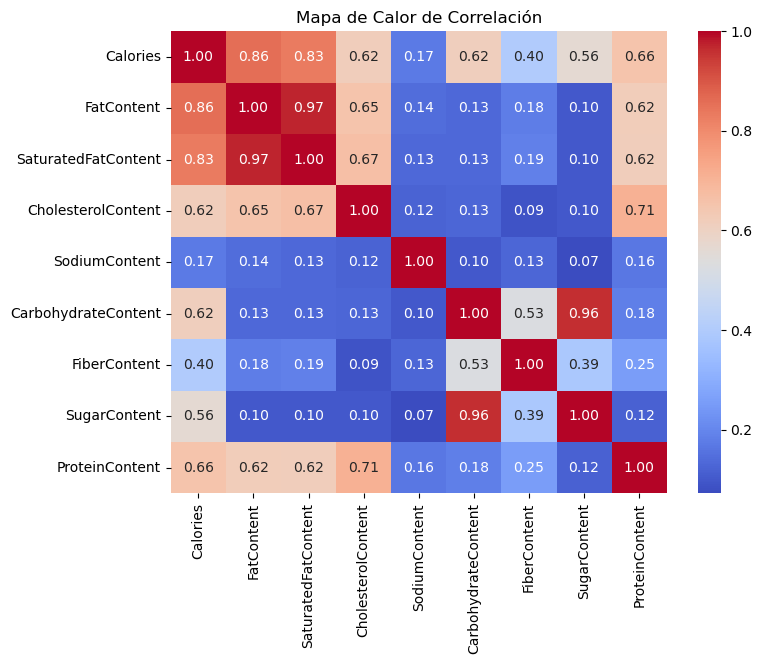

In [8]:
correlacion = data[columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño opcional del gráfico
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()

In [9]:
data.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

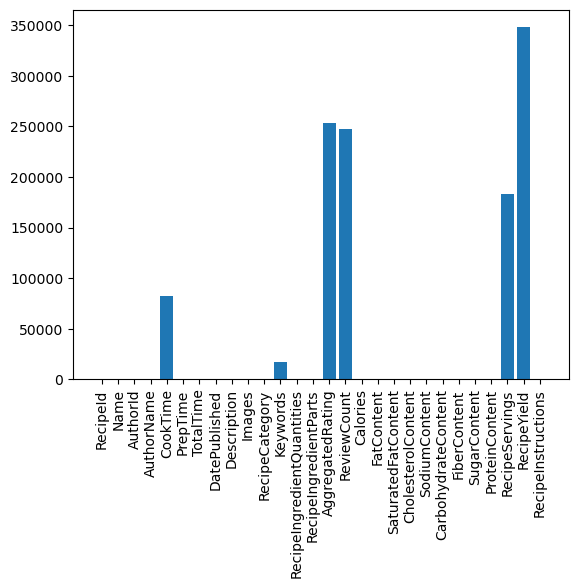

In [10]:
plt.bar(data.isna().sum().index, data.isna().sum().values)
plt.xticks(rotation=90)
plt.show()

In [11]:
data_procesada = data.drop(columns=["AggregatedRating", "ReviewCount", "RecipeYield", "CookTime"])
data_procesada.dropna(inplace=True)

In [12]:
def eliminar_sobrante(row): # elimina la c y los parentesis que roodean el texto en algunas columnas y las ocmillas sobrantes
    columnas = ["Keywords", "RecipeIngredientQuantities", "RecipeIngredientParts"]
    for nombre in columnas:
        row[nombre] = row[nombre][2:-1].replace('"', '').split(', ')
            
    return row

data_procesada = data_procesada.apply(eliminar_sobrante, axis=1)

In [13]:


condicion = (data_procesada[columns[0]] / data_procesada["RecipeServings"] > 2000) | (data_procesada[columns[0]] == 0)
condicion2 = (data_procesada[columns[0]] >= 0)
for i in range(1, len(columns)):
    condicion |= (data_procesada[columns[i]] / data_procesada["RecipeServings"] > 1000)
    condicion2 &= (data_procesada[columns[i]] == 0)
    
data_valores_altos = data_procesada.copy()[condicion | condicion2]

len(data_valores_altos)

7993

In [14]:
data_procesada = data_procesada[~(condicion | condicion2)]

In [15]:
data_procesada.to_csv('./dataset/recipes_procesado.csv', index=False)

In [16]:
data_procesada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319972 entries, 0 to 522514
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    319972 non-null  int64  
 1   Name                        319972 non-null  object 
 2   AuthorId                    319972 non-null  int64  
 3   AuthorName                  319972 non-null  object 
 4   PrepTime                    319972 non-null  object 
 5   TotalTime                   319972 non-null  object 
 6   DatePublished               319972 non-null  object 
 7   Description                 319972 non-null  object 
 8   Images                      319972 non-null  object 
 9   RecipeCategory              319972 non-null  object 
 10  Keywords                    319972 non-null  object 
 11  RecipeIngredientQuantities  319972 non-null  object 
 12  RecipeIngredientParts       319972 non-null  object 
 13  Calories           

In [17]:
data_entrenamiento = data_procesada.drop(columns=["AuthorId", "AuthorName", "DatePublished", "PrepTime",
                   "Images", "Name", "RecipeInstructions", "Description"])

In [18]:
data_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319972 entries, 0 to 522514
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    319972 non-null  int64  
 1   TotalTime                   319972 non-null  object 
 2   RecipeCategory              319972 non-null  object 
 3   Keywords                    319972 non-null  object 
 4   RecipeIngredientQuantities  319972 non-null  object 
 5   RecipeIngredientParts       319972 non-null  object 
 6   Calories                    319972 non-null  float64
 7   FatContent                  319972 non-null  float64
 8   SaturatedFatContent         319972 non-null  float64
 9   CholesterolContent          319972 non-null  float64
 10  SodiumContent               319972 non-null  float64
 11  CarbohydrateContent         319972 non-null  float64
 12  FiberContent                319972 non-null  float64
 13  SugarContent       

In [19]:
data_entrenamiento.to_csv('./dataset/recipes_entrenamiento.csv', index=False)